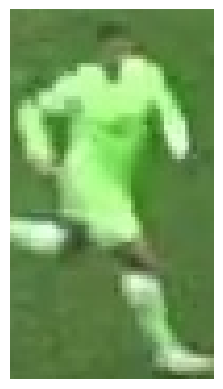

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load image using OpenCV and convert it to RGB
image_path = '/home/fox/Desktop/Football-Analysis-system/videos/output_videos/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

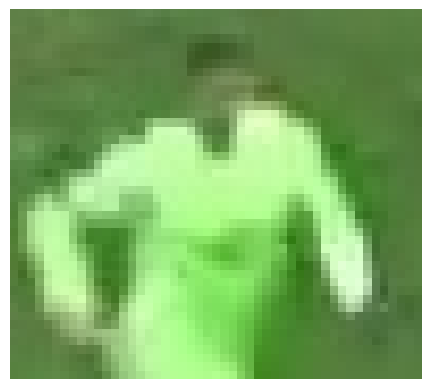

In [3]:
# Crop the image to get top half of the image
height, width, _ = image.shape
cropped_image = image[:height//2, :]
plt.imshow(cropped_image)
plt.axis('off')
plt.show()

## Cluster image into Two Clusters

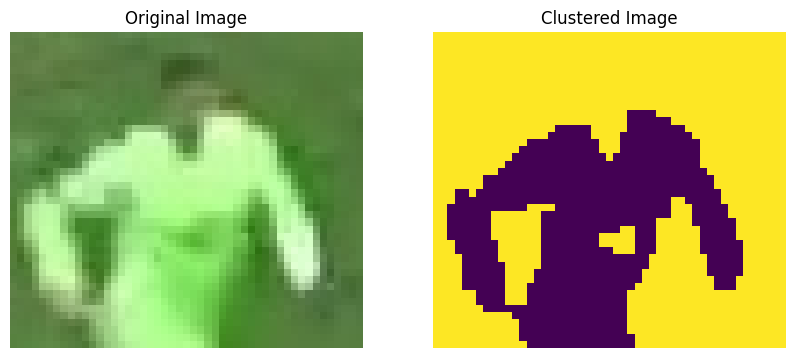

In [4]:
# Reshape the image to a 2D array of pixels
pixels = cropped_image.reshape(-1, 3)

# Perform KMeans clustering to find dominant colors
kmeans = KMeans(n_clusters=2 , random_state=0).fit(pixels)

# Get the cluster centers and labels
colors = kmeans.cluster_centers_
labels = kmeans.labels_

# Get cropped image dimensions
height, width, _ = cropped_image.shape

# reshape the labels to the original image shape
cluster_image  = labels.reshape(height, width)

# Display the dominant colors and the clustered image
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.imshow(cropped_image)
plt.axis('off')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(cluster_image)
plt.axis('off')
plt.title('Clustered Image')
plt.show()

In [9]:
# Get the corner pixels of the image
corner_cluster = [cluster_image[0, 0], cluster_image[0, -1], cluster_image[-1, 0], cluster_image[-1, -1]]

# Get the most frequent cluster in the corner pixels
non_player_cluster = max(set(corner_cluster), key=corner_cluster.count)

# Get the player cluster
player_cluster = 1-non_player_cluster
# Get the colors of the clusters
non_player_cluster_colors =colors[non_player_cluster]
player_cluster_colors = colors[player_cluster]
# Print the clusters
print(f'Non Player Cluster {non_player_cluster}\nPlayer Cluster: {player_cluster}')
print(f'Non Player Cluster Colors: {non_player_cluster_colors}\nPlayer Cluster Colors: {player_cluster_colors}')

Non Player Cluster 1
Player Cluster: 0
Non Player Cluster Colors: [ 86.46468927 130.73658192  62.36723164]
Player Cluster Colors: [171.38378378 235.65405405 142.8472973 ]
